In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Q1

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/advertising.csv')
data

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


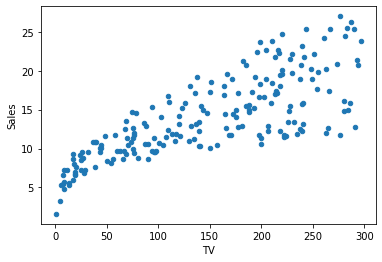

In [3]:
#1a
data.plot.scatter(x = 'TV', y = 'Sales')

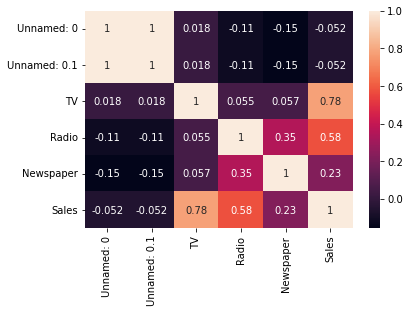

In [5]:
#1b
sns.heatmap(data.corr(),annot=True)

Estimated coefficients:
b_0 = 7.032593549127699 
b_1 = 0.04753664043301972


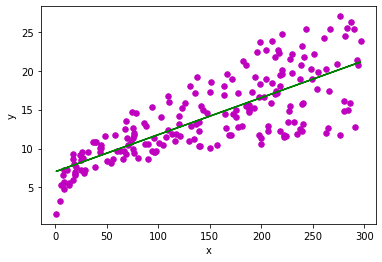

In [24]:
#2,3,4
def estimate_coef(x, y):
	n = np.size(x)
	m_x = np.mean(x)
	m_y = np.mean(y)
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x
	return (b_0, b_1)

def plot_regression_line(x, y, b):
	plt.scatter(x, y, color = "m",marker = "o", s = 30)
	y_pred = b[0] + b[1]*x
	plt.plot(x, y_pred, color = "g")
	plt.xlabel('x')
	plt.ylabel('y')
	plt.show()


b = estimate_coef(data["TV"], data["Sales"])
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
plot_regression_line(data["TV"], data["Sales"], b)


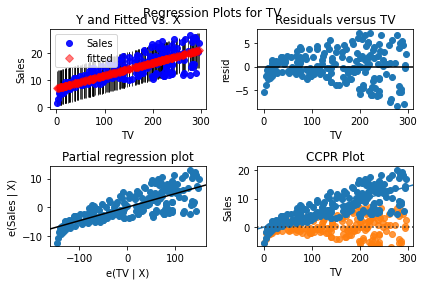

In [19]:
#5
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn

linear_model = ols('Sales ~ TV ', data=data).fit()

fig = sm.graphics.plot_regress_exog(linear_model,'TV')
sns.residplot(x='TV',y='Sales',data=data)
plt.show()

# Q2

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/pima-indians-diabetes.csv")
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [27]:
#1
df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.isna().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

Data is Clean.

In [48]:
df.to_csv("D:\Amrita College\SEM-5\Data Science\Datasets\pima-indians-diabetes.csv")

In [65]:
#2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scal = scaler.fit_transform(df)
scal

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.36426474,
        -0.18894038, -0.73075304],
       [ 1.23423997,  1.94447577, -0.26357823, ...,  0.60470064,
        -0.1037951 ,  1.36845138],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.91968415,
        -1.0403932 , -0.73075304],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.68423462,
        -0.27408566, -0.73075304],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.37030191,
         1.17338414,  1.36845138],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.47293375,
        -0.87010264, -0.73075304]])

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop(['1'], axis = 1)
y = df['1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [56]:
#3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7597402597402597

In [58]:
#4
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[93,  8],
       [29, 24]])

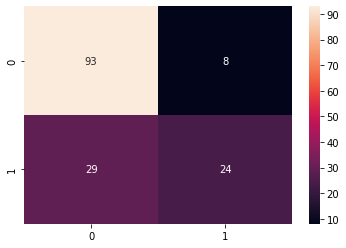

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt="g")